In [1]:
# import libraries
library(readxl)

## Tarea 2

In [2]:
# Read the Lab1_Datos.xslx file
tarea2 <- read_excel("Lab1_Datos.xlsx", sheet="Tarea 2")

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`


In [18]:
# Print the data
print(tarea2)

# A tibble: 12 × 5
   `Font: www.ine.es`            ...2                  ...3  ...4          ...5 
   <chr>                         <chr>                 <lgl> <chr>         <chr>
 1 Población de Hecho, Barcelona NA                    NA    Població de … NA   
 2 NA                            Barcelona (provincia) NA    NA            Espa…
 3 1900                          1054541               NA    1986          3847…
 4 1910                          1141733               NA    1987          3872…
 5 1920                          1349282               NA    1988          3921…
 6 1930                          1800638               NA    1989          3954…
 7 1940                          1931875               NA    1990          3988…
 8 1950                          2232119               NA    1991          3887…
 9 1960                          2877966               NA    1992          3913…
10 1970                          3929194               NA    1993          3979…
11 1981  

In [4]:
summary(tarea2)

 Font: www.ine.es       ...2             ...3             ...4          
 Length:12          Length:12          Mode:logical   Length:12         
 Class :character   Class :character   NA's:12        Class :character  
 Mode  :character   Mode  :character                  Mode  :character  
     ...5          
 Length:12         
 Class :character  
 Mode  :character  

In [5]:
# Separate in 2 subdatasets excluding the first 3 rows, the first dataset contains the columns 1 and 2, and the second dataset contains the columns 4 and 5
data1 <- tarea2[, c(1,2)]
data2 <- tarea2[, c(4,5)]

# Print the data
print(data1)
print(data2)

# A tibble: 12 × 2
   `Font: www.ine.es`            ...2                 
   <chr>                         <chr>                
 1 Población de Hecho, Barcelona NA                   
 2 NA                            Barcelona (provincia)
 3 1900                          1054541              
 4 1910                          1141733              
 5 1920                          1349282              
 6 1930                          1800638              
 7 1940                          1931875              
 8 1950                          2232119              
 9 1960                          2877966              
10 1970                          3929194              
11 1981                          4618734              
12 1991                          4690996              
# A tibble: 12 × 2
   ...4                         ...5    
   <chr>                        <chr>   
 1 Població de Derecho, Espanya NA      
 2 NA                           España  
 3 1986                     

In [6]:
# Summary of the data
summary(data1)

 Font: www.ine.es       ...2          
 Length:12          Length:12         
 Class :character   Class :character  
 Mode  :character   Mode  :character  

In [7]:
# Summary of the data2
summary(data2)

     ...4               ...5          
 Length:12          Length:12         
 Class :character   Class :character  
 Mode  :character   Mode  :character  

##### 1. ¿Cuántas  observaciones  tienen  estas  dos  series  temporales?  Justifica  el resultado en cada caso (¿cómo has hecho el cálculo?). 

Como se puede observar en los print anteriores, en los dos casos, el num. de muestras es 10.

##### 2. ¿Cuál es la frecuencia de los datos?

Como se puede observar en los print anteriores, en el primer caso la frecuencia de los datos es cada 10 años, mientras que en el segundo, es anual.

##### 3. Haz el gráfico con R (un gráfico para cada serie).

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”


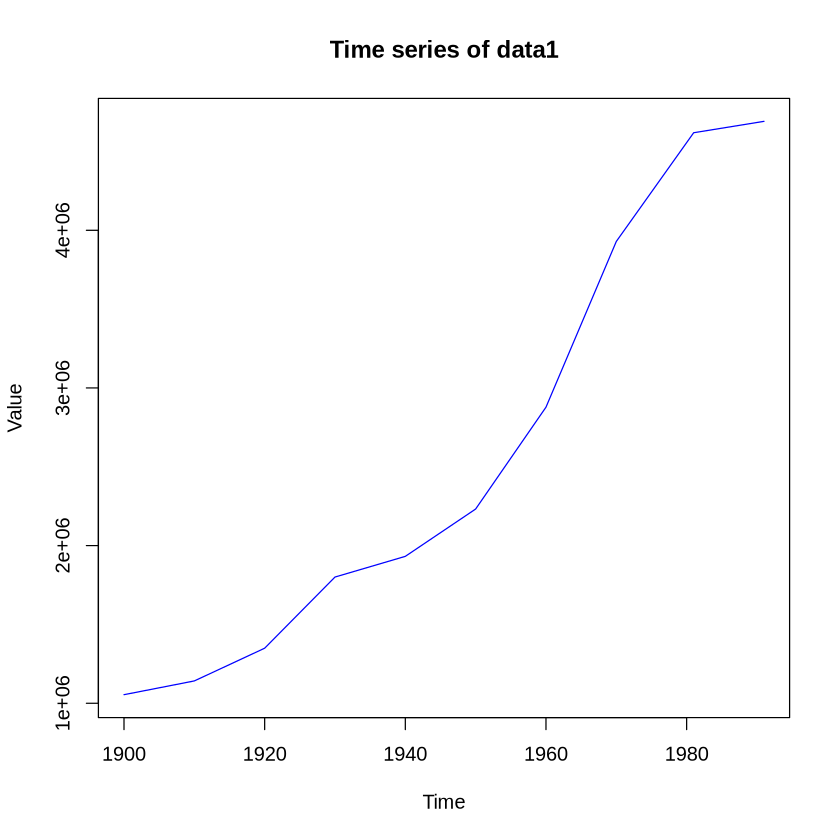

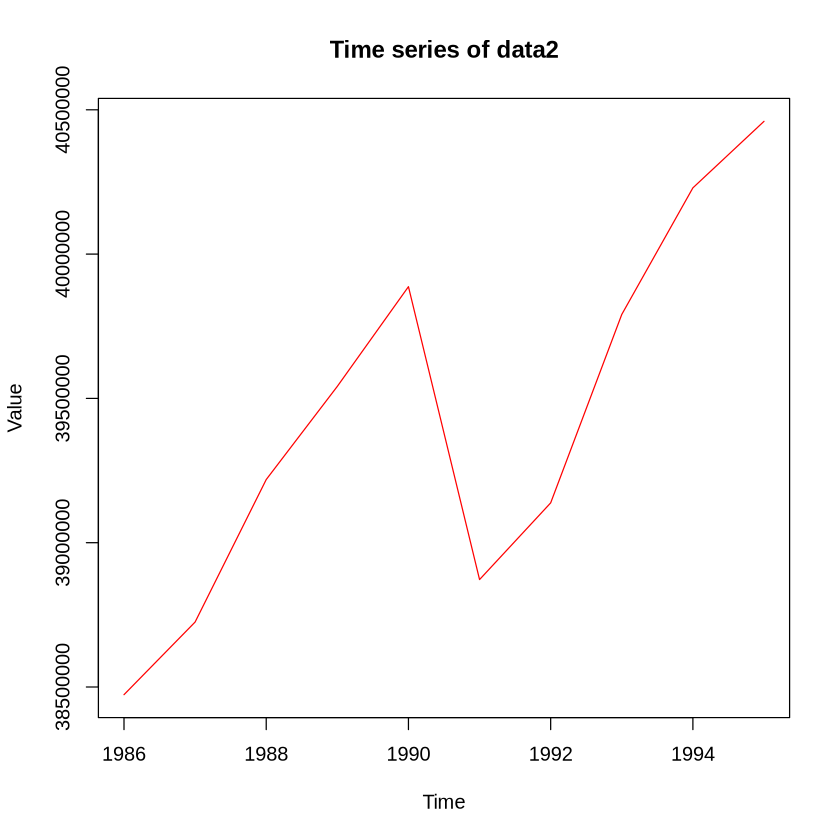

In [8]:
# Chart timeseries of data1 and data2
plot(data1, type="l", col="blue", xlab="Time", ylab="Value", main="Time series of data1")
plot(data2, type="l", col="red", xlab="Time", ylab="Value", main="Time series of data2")

##### 4. A  partir  de  la  representación  gráfica,  justifica  si  tienen  componente estacional y/o tendencia. (No hagas ningún contraste de hipótesis).

En ambos casos observamos una fuerte tendencia alcista, además, en el primero observamos como esta tendencia es continua a traves de todo su dominio, sin embargo, en el caso de la segunda vemos como hay un fuerte movimiento de retroceso en contra de la tendencia positiva que se corrige rapidamente.

En cuanto a la estacionalidad, no se aprecia en ninguno de los dos casos con suficiente claridad como para afirmar que exista. 

## Tarea 3

In [9]:
# Read the Lab1_Datos.xslx file
tarea3 <- read_excel("Lab1_Datos.xlsx", sheet="Tarea 3")

# Dataset starts in row 5
tarea3 <- tarea3[-c(1:4),]

New names:
• `` -> `...2`


In [10]:
# Print the data
print(tarea3)

# A tibble: 83 × 2
   `Hipotecas sobre inmuebles urbanos (númeor de hipotecas constituidas)` ...2 
   <chr>                                                                  <chr>
 1 2003M01                                                                89642
 2 2003M02                                                                88381
 3 2003M03                                                                85577
 4 2003M04                                                                77475
 5 2003M05                                                                86628
 6 2003M06                                                                82968
 7 2003M07                                                                83387
 8 2003M08                                                                67572
 9 2003M09                                                                86018
10 2003M10                                                                90806
# ℹ 73 more rows


In [11]:
names(tarea3) <- c("Fecha", "Yt")

In [12]:
library(dplyr)
library(zoo)

# Parse the first column to date knowing that the format is "YearMMonth"
tarea3 <- tarea3 %>% mutate(Fecha = as.yearmon(sub("M", "-", Fecha), format="%Y-%m"))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [13]:
head(tarea3)

Fecha,Yt
<yearmon>,<chr>
Jan 2003,89642
Feb 2003,88381
Mar 2003,85577
Apr 2003,77475
May 2003,86628
Jun 2003,82968


In [14]:
tarea3$Yt <- as.numeric(tarea3$Yt)

##### 1. ¿Cuántas  observaciones  tiene  la  serie  temporal?  Justifica  el  resultado (¿cómo has hecho el cálculo?).

In [15]:
# rows with data
n <- nrow(tarea3)
print(n)

[1] 83


Hay un total de 83 observaciones

##### 2. ¿Cuál es la frecuencia de los datos?

In [16]:
head(tarea3)

Fecha,Yt
<yearmon>,<dbl>
Jan 2003,89642
Feb 2003,88381
Mar 2003,85577
Apr 2003,77475
May 2003,86628
Jun 2003,82968


La frecuencia es mensual.

##### 3. Haz el gráfico con R

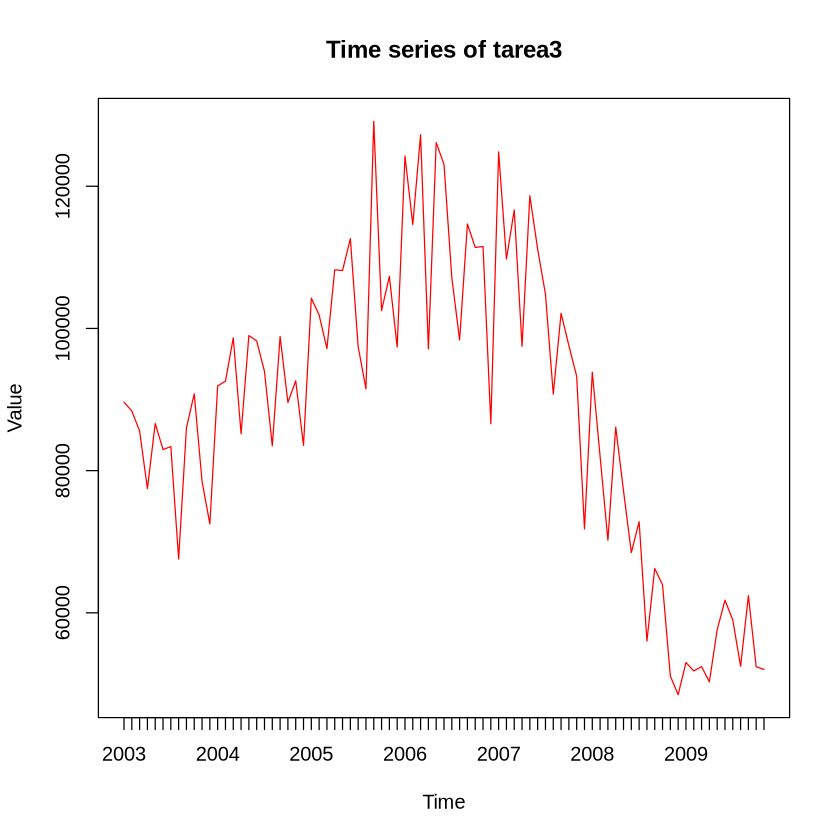

In [17]:
# plot timeseries
plot(tarea3$Fecha, tarea3$Yt, type="l", col="red", xlab="Time", ylab="Value", main="Time series of tarea3")

##### 4. A partir de la representación gráfica, ¿crees que la serie tiene tendencia? ¿Es creciente o decreciente? Comenta brevemente.

La gráfica muestra distintas tendencias a lo largo del tiempo. Primeramente se puede observar una tendencia creciente de 2003 a 2006, tanto en valor de las observaciones como en variabilidad.

Posteriormente se puede ver una fuerte tendencia descendiente de 2007 a 2009.

## Tarea 4

In [49]:
tarea4 <- read_excel("Lab1_Datos.xlsx", sheet="Tarea 4")
tarea4 <- tarea4[-c(1:2),]

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`


In [50]:
print(tarea4)

# A tibble: 14 × 4
   `Datos Tarea 4` ...2  ...3     ...4    
   <chr>           <chr> <chr>    <chr>   
 1 t               Yt    Mètode A Mètode B
 2 1997            1.29  --       --      
 3 1998            1.36  1.29     1.37    
 4 1999            1.52  1.36     1.51    
 5 2000            1.57  1.52     1.86    
 6 2001            2.3   1.57     2.22    
 7 2002            2.35  2.3      2.59    
 8 2003            3.07  2.35     2.95    
 9 2004            3.22  3.07     3.32    
10 2005            3.86  3.22     3.68    
11 2006            3.92  3.86     4.04    
12 2007            3.94  3.86     4.41    
13 2008            4.34  3.86     4.77    
14 2009            4.84  3.86     5.13    


En el excel observamos como hay una linea separando 2005 y 2006 por lo que supondremos que es ahi donde empiezan las predicciones extramuestrales.

##### 1. Utilizando exclusivamente la información del período de muestra, justifica cuál es el método que hace mejores predicciones y determina su capacidad predictiva.

###### Metodo A
**EAM muestral**: (0.07 + 0.16 + 0.05 + 0.73 + 0.05 + 0.72 + 0.15 + 0.64) / 8 = **0.32125**

**ECM muestral**: (0.0049 + 0.0256 + 0.0025 + 0.5329 + 0.0025 + 0.5184 + 0.0225 + 0.4096) / 8 = **0.1898625**

###### Metodo B
**EAM muestral**: (0.01 + 0.01 + 0.29 + 0.08 + 0.24 + 0.12 + 0.10 + 0.18) / 8 = **0.12875**

**ECM muestral**: (0.001 + 0.001 + 0.0841 + 0.0064 + 0.0576 + 0.0144 + 0.01 + 0.0324) / 8 = **0.0258625**

El mejor metodo es claramente el B debido a su menor error en ambas métricas.

##### 2. ¿Se mantiene la ordenación de los métodos si las predicciones se evalúan exclusivamente con los datos del período extra-muestral? ¿Cuál es ahora la capacidad predictiva del mejor de los dos métodos? 

###### Metodo A
**EAM extramuestral**: (0.06 + 0.08 + 0.48 + 0.98) / 4 = **0.4**

**ECM extramuestral**: (0.0036 + 0.0064 + 0.2304 + 0.9604) / 4 = **0.3002**

###### Metodo B
**EAM extramuestral**: (0.12 + 0.47 + 0.43 + 0.29) / 4 = **0.3275**

**ECM extramuestral**: (0.0144 + 0.2209 + 0.1849 + 0.0841) / 4 = **0.126075**

Efectivamente, el metodo B sigue manteniendose como la mejor opcion entre ambos metodos. Ademas de que el metodo A parece tener una capacidad de prediccion nula puesto que predice siempre el mismo valor.

##### 3. Realiza dos gráficos de todas las observaciones disponibles: (a) con la serie original (Yt) y las predicciones con el método A; y (b) con la serie original (Yt) y las predicciones con el método B. Comenta los resultados obtenidos y compáralos con los de los apartados 1) y 2). 

In [51]:
tarea4 <- tarea4[-c(1:1),]
names(tarea4) <- c("Fecha", "Yt", "A","B")

tarea4$Yt <- as.numeric(tarea4$Yt)
tarea4$A <- as.numeric(tarea4$A)
tarea4$B <- as.numeric(tarea4$B)

print(tarea4)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


# A tibble: 13 × 4
   Fecha    Yt     A     B
   <chr> <dbl> <dbl> <dbl>
 1 1997   1.29 NA    NA   
 2 1998   1.36  1.29  1.37
 3 1999   1.52  1.36  1.51
 4 2000   1.57  1.52  1.86
 5 2001   2.3   1.57  2.22
 6 2002   2.35  2.3   2.59
 7 2003   3.07  2.35  2.95
 8 2004   3.22  3.07  3.32
 9 2005   3.86  3.22  3.68
10 2006   3.92  3.86  4.04
11 2007   3.94  3.86  4.41
12 2008   4.34  3.86  4.77
13 2009   4.84  3.86  5.13


Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


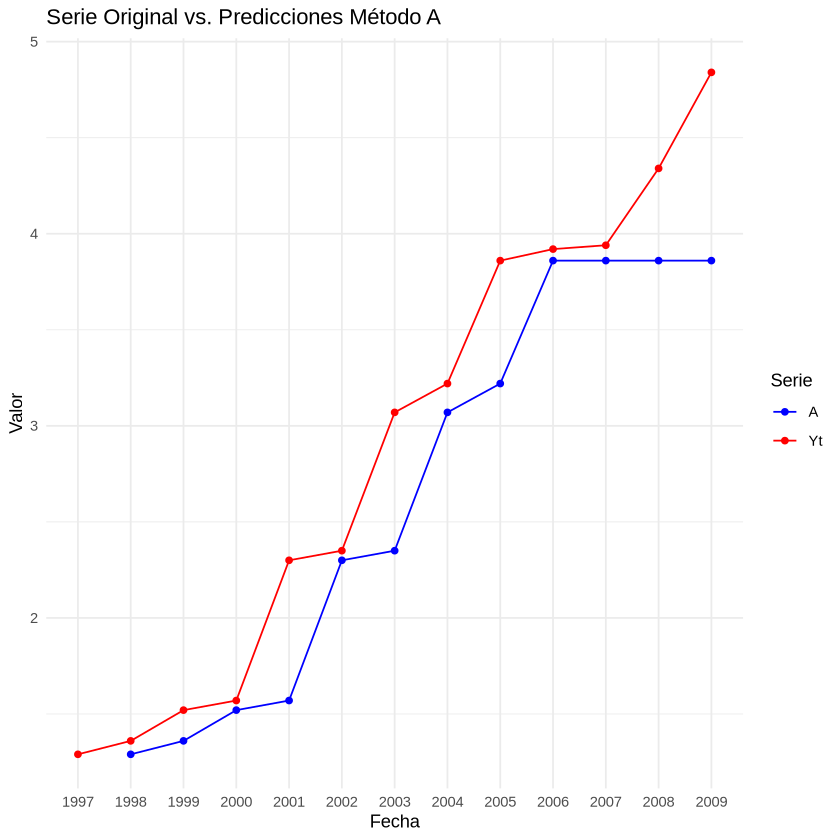

In [52]:
if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)
library(tidyr)

tarea4_long <- tarea4 %>%
  pivot_longer(cols = c(Yt, A, B), names_to = "Serie", values_to = "Valor")

ggplot(subset(tarea4_long, Serie %in% c("Yt", "A")), aes(x = Fecha, y = Valor, color = Serie, group = Serie)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  labs(x = "Fecha", y = "Valor", title = "Serie Original vs. Predicciones Método A") +
  scale_color_manual(values = c("blue", "red"))

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


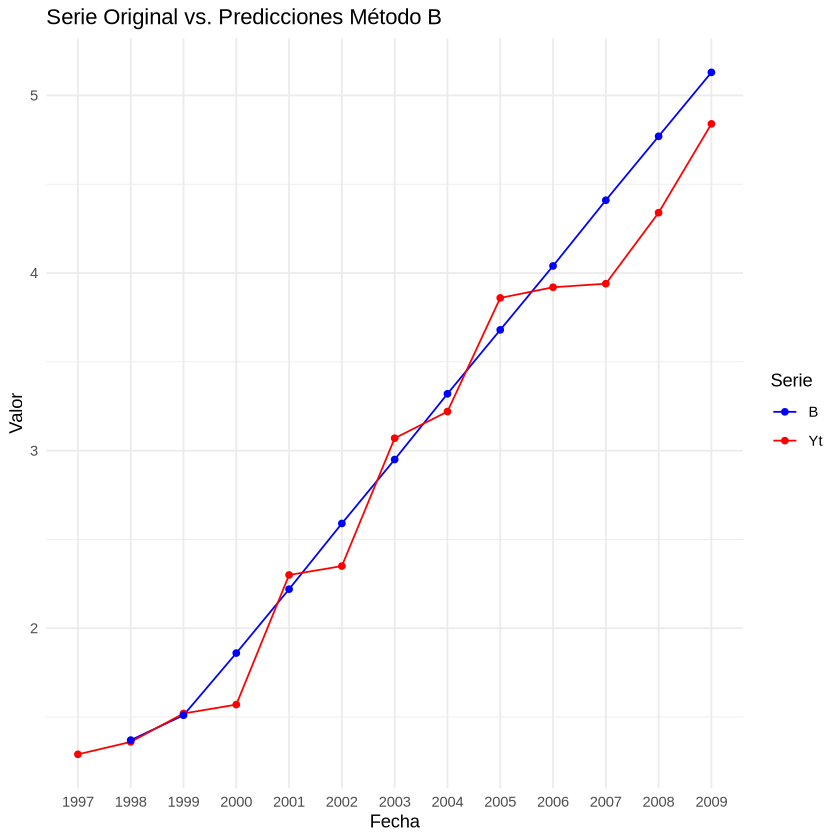

In [182]:
ggplot(subset(tarea4_long, Serie %in% c("Yt", "B")), aes(x = Fecha, y = Valor, color = Serie, group = Serie)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  labs(x = "Fecha", y = "Valor", title = "Serie Original vs. Predicciones Método B") +
  scale_color_manual(values = c("blue", "red"))

En los graficos se aprecia lo que veniamos viendo con los errores, y es que el metodo B parece adaptarse mucho mejor a los datos mostrandonos lo que practicamente parece una linea recta ascendente que nunca se aleja demasiado, mientras que en el grafico del metodo A observamos como a partir de 2006 las predicciones se quedan estancadas en el mismo valor.

**Punto importante a mencionar, el metodo A parece ser el metodo ingenuo.**

##### 4. ¿Tiene sentido comparar el Error Absoluto Medio (EAM) del período de muestra con el del período extra-muestral? ¿Y el Error Cuadrático Medio (EQM)? ¿Por qué? 

Si, ya que puede proporcionar información valiosa sobre el rendimiento y la generalización del modelo predictivo. Al fin y al cabo la diferencia entre ellos será que tan lejos esta la informacion predecida de la informacion real, con lo cual lo natural sera ver como los errores se van haciendo mayores, por lo que lo natural seria tener un error mayor en el periodo extra-muestral, sin embargo sigue siendo una buena practica para evaluar la caida de eficiencia y el rendimiento del modelo en general.

## Tarea 5

In [140]:
tarea5 <- read_excel("Lab1_Datos.xlsx", sheet="Tarea 5")
tarea5 <- tarea5[-c(1:2),]

New names:
• `` -> `...2`
• `` -> `...3`


In [141]:
print(tarea5)

# A tibble: 33 × 3
   `Datos Tarea 5`                                                   ...2  ...3 
   <chr>                                                             <chr> <chr>
 1 Serie temporal 1: Ventas mensuales de una empresa, en miles de E… NA    NA   
 2 t                                                                 Yt    Pred…
 3 39965                                                             77.24 NA   
 4 39995                                                             78.68 78.59
 5 40026                                                             79.13 81.74
 6 40057                                                             85.7  84.98
 7 40087                                                             86.15 88.31
 8 40118                                                             92.63 91.55
 9 40148                                                             93.98 94.88
10 NA                                                                NA    NA   
# ℹ 23 mo

##### 1. Calcula el Error Absoluto Medio (EAM), el Error Cuadrático Medio (EQM) y el Error Porcentual Absoluto Medio (EPAM) del período extra-muestral de la predicción de ambas series temporales. 

In [133]:
names(tarea5) <- c("Fecha", "Yt", "Pred")
tarea5$Yt <- as.numeric(sub(",", ".", tarea5$Yt))
tarea5$Pred <- as.numeric(sub(",", ".", tarea5$Pred))
aux <- tarea5[-c(1:10),]


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [103]:
EAM <- 0

for (x in 1:5) {
  EAM <- EAM + abs(aux[x,2] - aux[x,3])
}

EAM <- EAM / 5
print(EAM)

     Yt
1 2.682


###### Serie 1
**EAM extraemuestral**: () / 4 = **0.**

**ECM extramuestral**: () / 4 = **0.**

**EPAM extramuestral**: () / 4 = **0.**

## Tarea 6

In [168]:
tarea6 <- read_excel("Lab1_Datos.xlsx", sheet="Tarea 6")
tarea6 <- tarea6[-c(1:3), -c(1:1)]
names(tarea6) <- c("Año", "Yt", "A", "B")
tarea6$Año <- as.character(tarea6$Año)
tarea6$Yt <- as.numeric(sub(",", ".", tarea6$Yt))
tarea6$A <- as.numeric(sub(",", ".", tarea6$A))
tarea6$B <- as.numeric(sub(",", ".", tarea6$B))

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [169]:
print(tarea6)

# A tibble: 10 × 4
   Año      Yt     A     B
   <chr> <dbl> <dbl> <dbl>
 1 2003   28    NA      NA
 2 2004   27.6  27.1    NA
 3 2005   28.7  28.5    NA
 4 2006   34.4  33.5    NA
 5 2007   45.5  44.8    NA
 6 2008   45.5  46      NA
 7 2009   40.1  40.6    NA
 8 2010   26.9  27.2    NA
 9 2011   26.2  27      NA
10 2012   30.1  29.5    NA


##### 1. Calcula los valores de la predicción del Método B aplicando el método 
ingenuo comentado en clase. 

In [170]:
for (x in 2:10) {
    tarea6$B[x] <- tarea6$Yt[x - 1]
}

print(tarea6)

# A tibble: 10 × 4
   Año      Yt     A     B
   <chr> <dbl> <dbl> <dbl>
 1 2003   28    NA    NA  
 2 2004   27.6  27.1  28  
 3 2005   28.7  28.5  27.6
 4 2006   34.4  33.5  28.7
 5 2007   45.5  44.8  34.4
 6 2008   45.5  46    45.5
 7 2009   40.1  40.6  45.5
 8 2010   26.9  27.2  40.1
 9 2011   26.2  27    26.9
10 2012   30.1  29.5  26.2


##### 2. Utilizando exclusivamente la información del período de muestra, justifiquen cuál es el método que realiza mejores predicciones y digan cuál es su capacidad predictiva. 

###### Metodo A

In [174]:
EAM <- 0
ECM <- 0

for (x in 2:7) {
  EAM <- EAM + abs(tarea6$A[x] - tarea6$Yt[x])
  ECM <- ECM + (tarea6$A[x] - tarea6$Yt[x])^2
}

EAM <- EAM / 6
ECM <- ECM / 6

print(EAM)
print(ECM)

[1] 0.55
[1] 0.3483333


###### Metodo B

In [175]:
EAM <- 0
ECM <- 0

for (x in 2:7) {
  EAM <- EAM + abs(tarea6$B[x] - tarea6$Yt[x])
  ECM <- ECM + (tarea6$B[x] - tarea6$Yt[x])^2
}

EAM <- EAM / 6
ECM <- ECM / 6

print(EAM)
print(ECM)

[1] 3.95
[1] 31.03833


Como observamos, el metodo A es mucho mejor ofreciendo errores muy por debajo del metodo B.

##### 3. ¿Se mantiene la ordenación de los métodos si las predicciones se evalúan exclusivamente con los datos del período extra-muestral? ¿Cuál es ahora la capacidad predictiva del mejor de los dos métodos? 

###### Metodo A

In [176]:
EAM <- 0
ECM <- 0

for (x in 8:10) {
  EAM <- EAM + abs(tarea6$A[x] - tarea6$Yt[x])
  ECM <- ECM + (tarea6$A[x] - tarea6$Yt[x])^2
}

EAM <- EAM / 3
ECM <- ECM / 3

print(EAM)
print(ECM)

[1] 0.5666667
[1] 0.3633333


###### Metodo B

In [177]:
EAM <- 0
ECM <- 0

for (x in 8:10) {
  EAM <- EAM + abs(tarea6$B[x] - tarea6$Yt[x])
  ECM <- ECM + (tarea6$B[x] - tarea6$Yt[x])^2
}

EAM <- EAM / 3
ECM <- ECM / 3

print(EAM)
print(ECM)

[1] 5.933333
[1] 63.31333


Como se aprecia, en el caso de el metodo A observamos unos errores muy similares entre el periodo muestral y extramuestral, mientras que con el metodo B si ya teniamos mucho error con los datos muestrales, este es mucho mayor con los extramuestrales. El metodo A sigue siendo mucho mejor que el metodo B.

##### 4. Realiza dos gráficos de todas las observaciones disponibles: (a) con la serie original (Yt) y las predicciones con el método A; y (b) con la serie original (Yt) y las predicciones con el método B. Comenta los resultados obtenidos y compáralos con los de los apartados a) y b). 

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


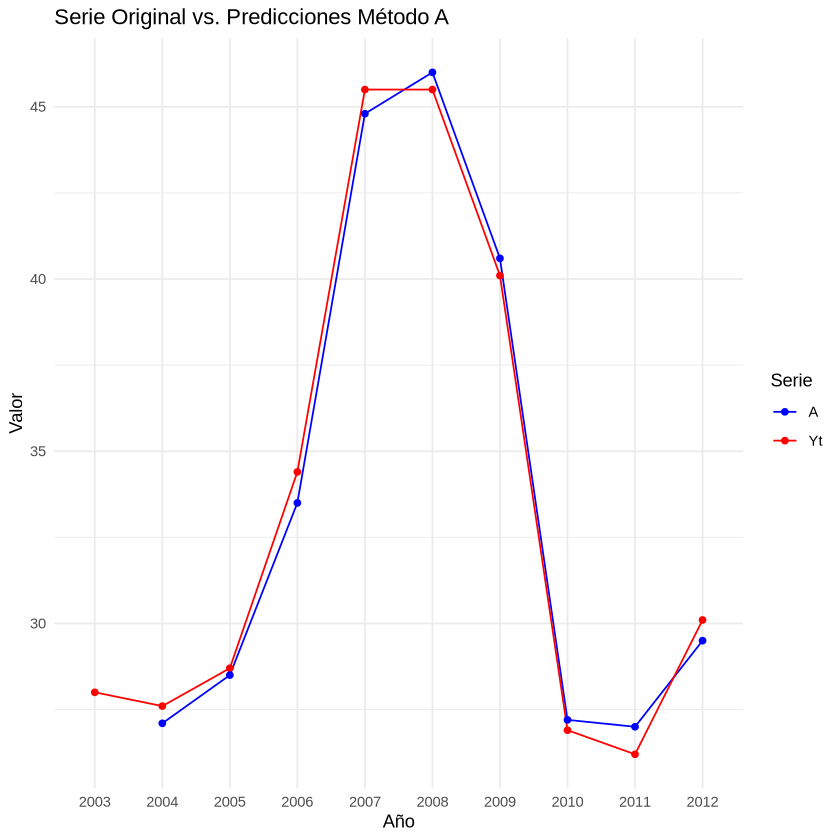

In [179]:
if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)
library(tidyr)

tarea6_long <- tarea6 %>%
  pivot_longer(cols = c(Yt, A, B), names_to = "Serie", values_to = "Valor")

ggplot(subset(tarea6_long, Serie %in% c("Yt", "A")), aes(x = Año, y = Valor, color = Serie, group = Serie)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  labs(x = "Año", y = "Valor", title = "Serie Original vs. Predicciones Método A") +
  scale_color_manual(values = c("blue", "red"))

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


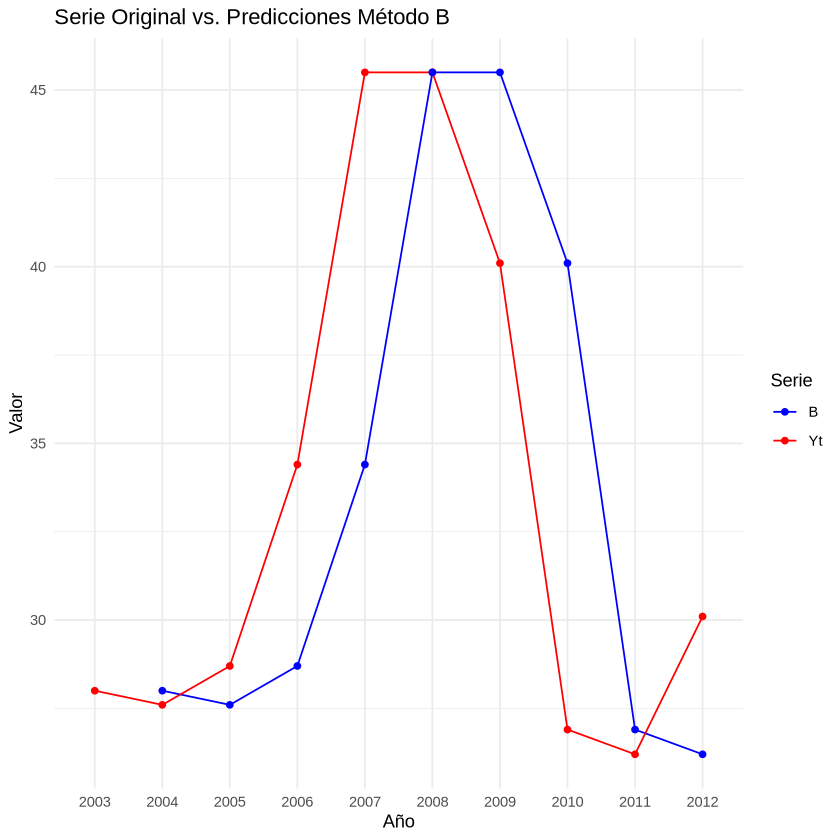

In [181]:
ggplot(subset(tarea6_long, Serie %in% c("Yt", "B")), aes(x = Año, y = Valor, color = Serie, group = Serie)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  labs(x = "Año", y = "Valor", title = "Serie Original vs. Predicciones Método B") +
  scale_color_manual(values = c("blue", "red"))

En los graficos se aprecia lo que veniamos viendo con los errores, y es que el metodo A parece adaptarse mucho mejor a los datos mostrandonos lo que practicamente parece una linea recta ascendente que nunca se aleja demasiado, mientras que en el grafico del metodo B observamos como con el metodo ingenuo, aunque si es cierto que no se aleja demasiado de la realidad, el resultado ni se acerca a lo conseguido con el metodo A.